In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [ ]:
# Read the dataset
df = pd.read_csv('ckd.csv')
data = df.copy()

In [ ]:
# print the shape of the dataset
print(data.shape)

(1138, 23)


In [4]:
# print the head of the dataset
data.head()

,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,CKD_Risk,Dipstick_Proteinuria,Proteinuria,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
0,2,74,120.0,23.1,2,12.0,4.0,1.20,34.15,3,6.0,2.0,1.0,0.0,1.25,3.0,1,0,0,1,1,0,0
1,1,39,121.0,31.7,3,15.0,4.7,1.31,50.45,3,5.0,0.0,0.0,0.0,0.33,2.0,1,0,0,0,0,0,0
2,1,74,143.0,24.6,2,10.9,3.8,4.95,9.80,5,12.0,3.0,1.0,0.0,1.76,3.0,1,0,1,1,1,1,1
3,1,57,139.0,28.5,2,15.9,4.8,0.84,73.57,2,4.0,1.0,1.0,0.0,0.51,3.0,1,0,0,0,0,0,0
4,1,32,154.0,24.6,4,14.4,4.4,0.87,83.56,2,1.0,-1.0,0.0,0.0,0.03,1.0,1,0,0,0,0,0,0


In [5]:
## count percentage of missing rows
missing_rows = data.isnull().sum().sort_values(ascending=False)
missing_percent = np.round(missing_rows/data.shape[0] * 100, 2)
missing_data = pd.concat([missing_rows, missing_percent], axis=1, keys=['Missing_n', 'Missing_%'])
missing_data

,Missing_n,Missing_%
BMI,137,12.04
CKD_Risk,88,7.73
Protein_Creatinine_Ratio,88,7.73
UPCR_Severity,88,7.73
Systolic_Pressure,18,1.58
Dipstick_Proteinuria,16,1.41
Proteinuria,16,1.41
Occult_Blood_in_Urine,16,1.41
Albumin,12,1.05
Hemoglobin,2,0.18


- From the table above, BMI has the highest missing number and the missing percentage is 12.04%.
- Protein_Creatinine_Ratio, CKD_Risk, UPCR_Severity has the same missing value of 88 or7.7% 
- Hemoglobin has the lowest missing value

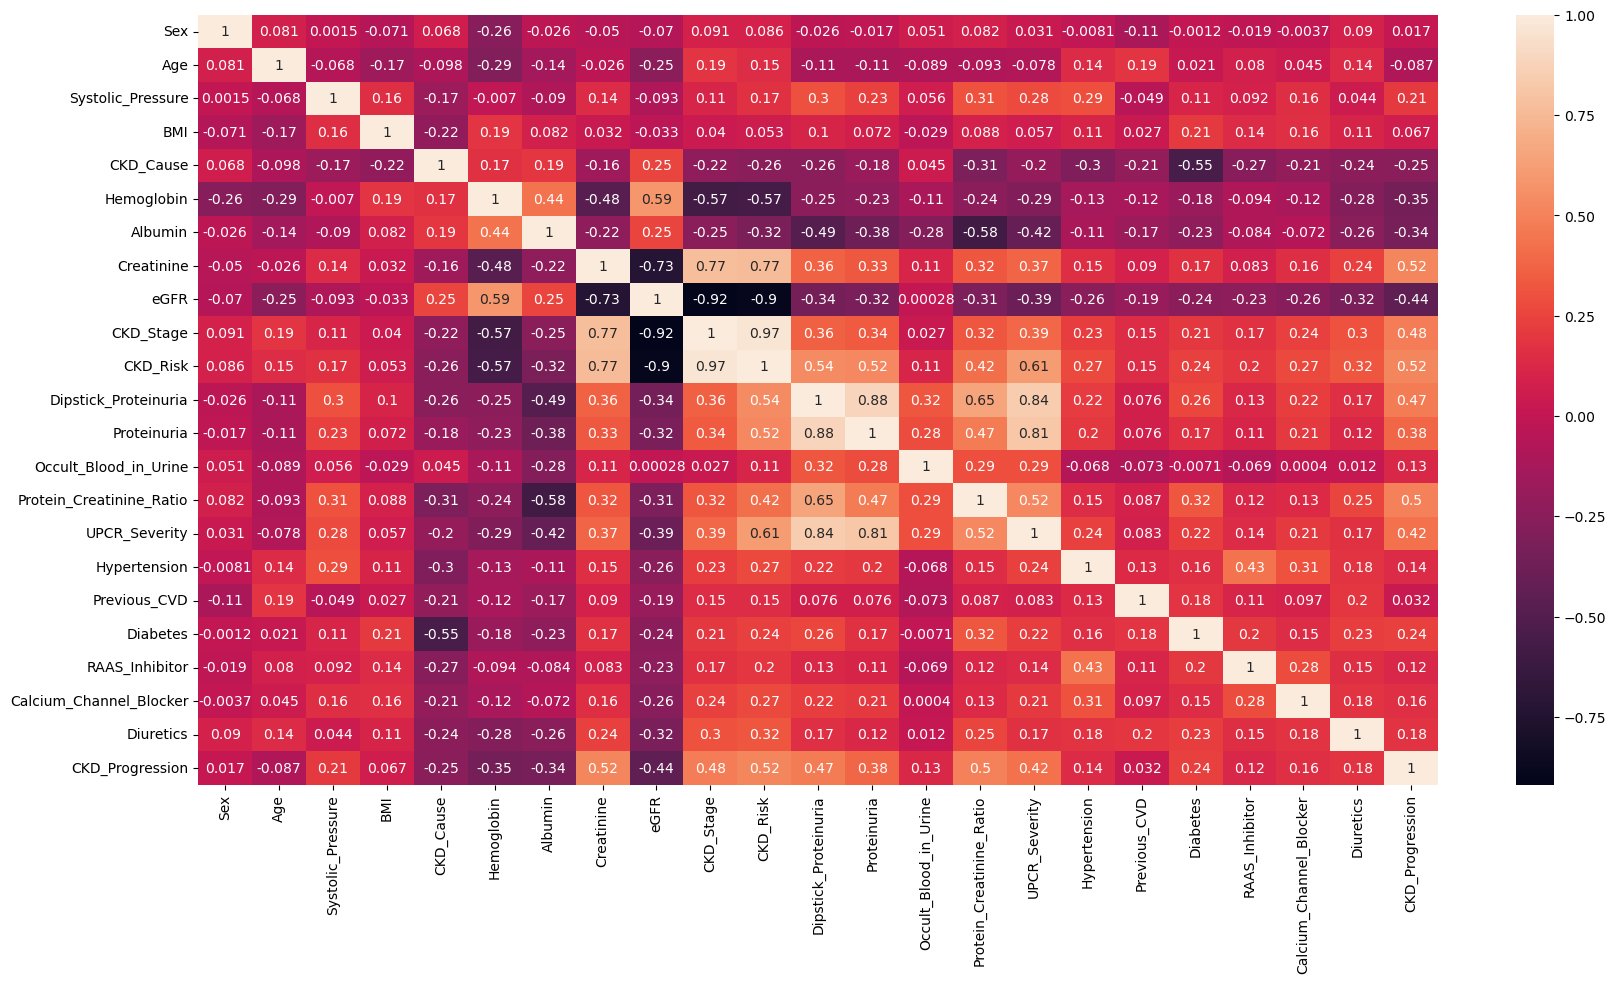

In [6]:
## view the correlation of the entire dataset attribute
corr = data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

In [7]:
## Check for duplicates
data.duplicated().sum()

0

There are no duplicates in the dataset

## Visualizing the data

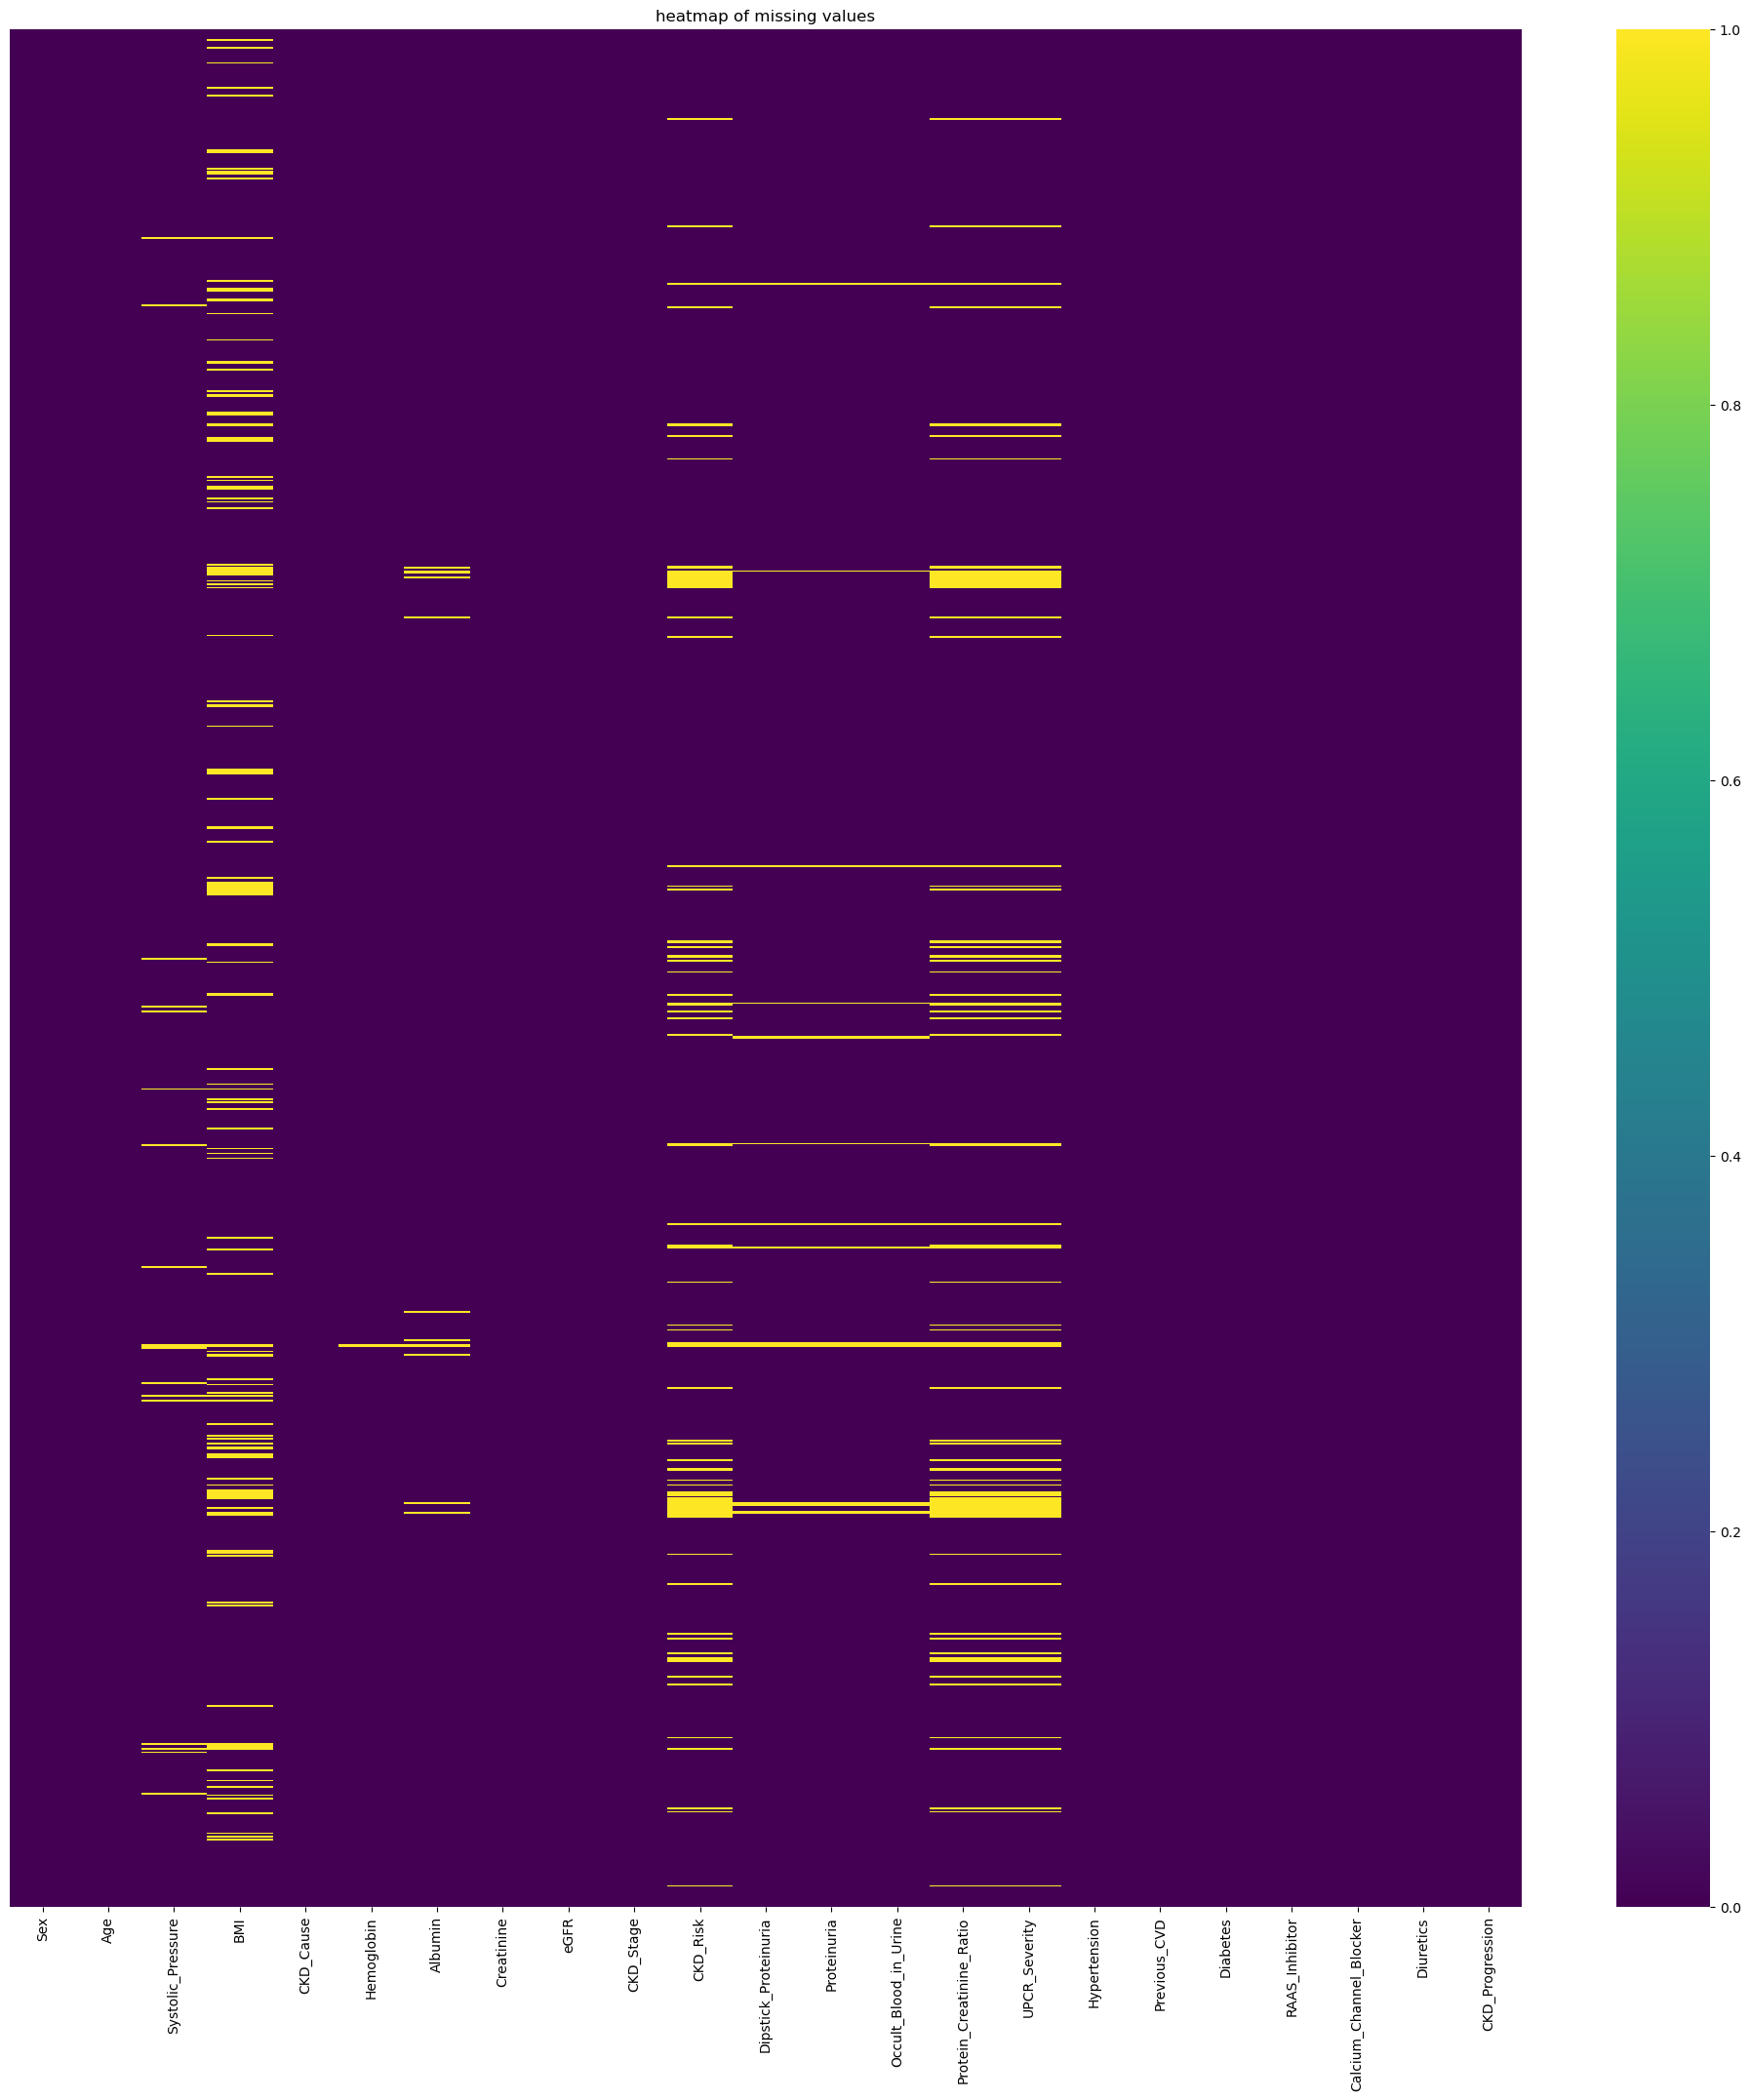

In [8]:
## Heatmap to understand the missing data
plt.figure(figsize=(25, 25))
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')
plt.title('heatmap of missing values')
plt.show()

- CKD_Risk, Protein_Creatinine_Ratio, UPCR_Severity have missing values on the same row.
- Dipstick_Proteinuria, Proteinuria, Occult_in_Blood_Urine have missing values on the same row. 

<Figure size 800x600 with 0 Axes>

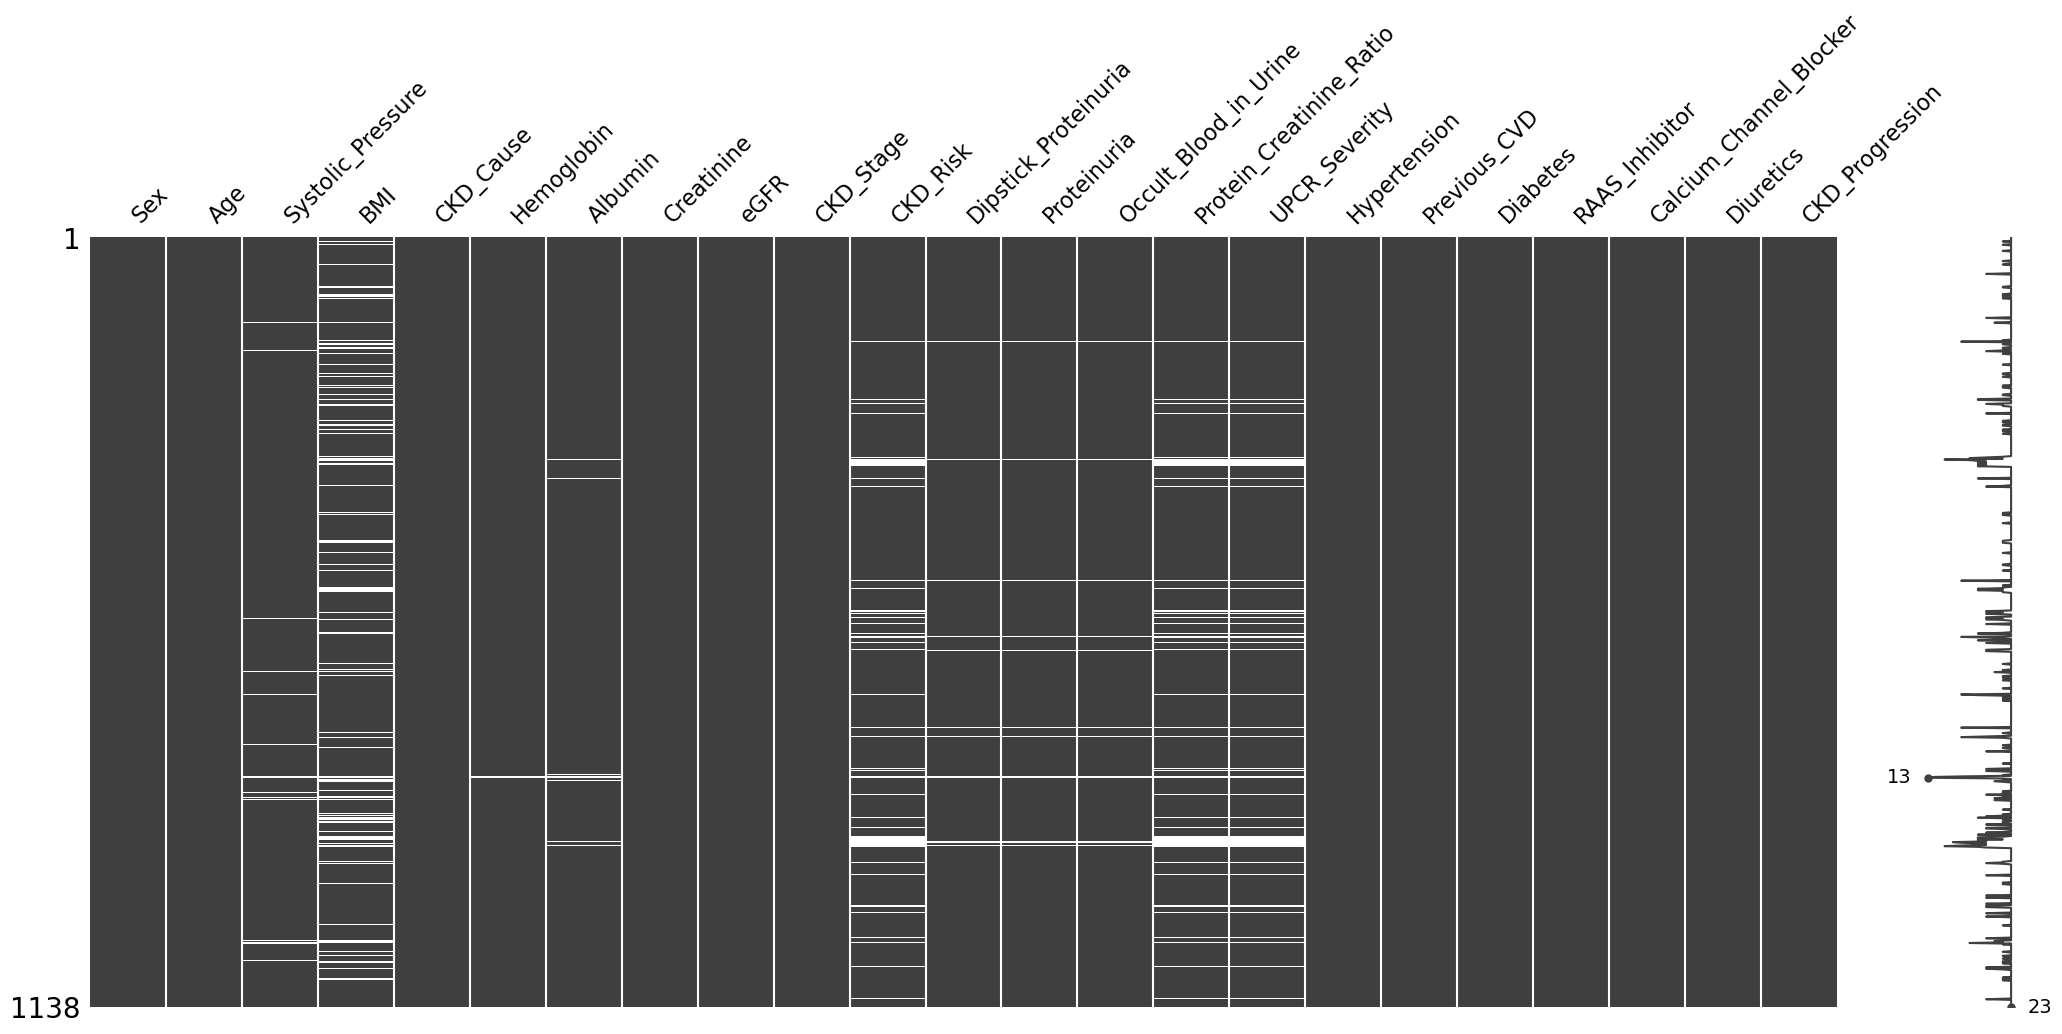

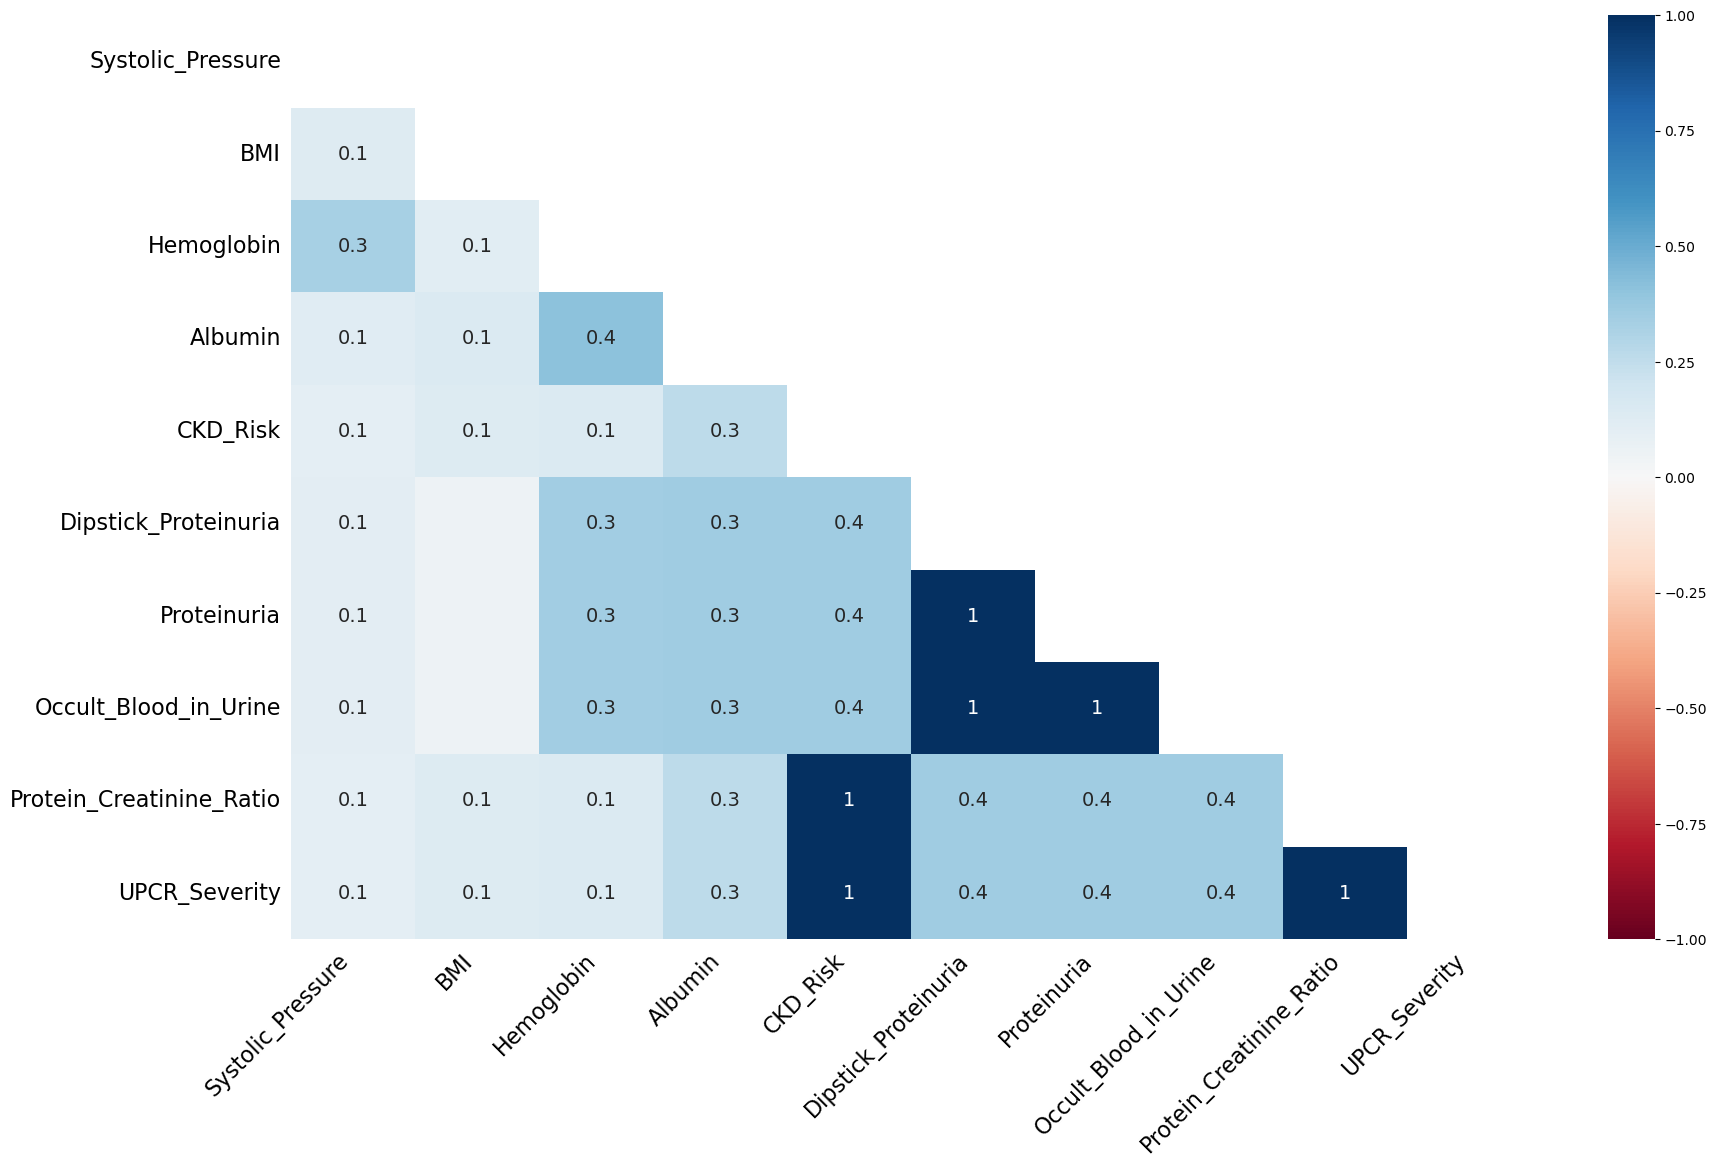

In [9]:
import missingno as msno
plt.figure(figsize=(8, 6))
%matplotlib inline
msno.matrix(data)
msno.heatmap(data)
plt.show()

# FILLING MISSING DATA


The plot above lets us understand which attribute has missing rows in common with other attributes
- Protein_Creatinine_Ratio, CKD_Risk, and UPCR_Severity have missing values in the same rows. Since these attributes are highly correlated in the missing v with each other and with other clinical features, imputing them could introduce bias into the dataset.
- We will drop the missing rows in Protein_Creatinine_Ratio, CKD_Risk, and UPCR_Severity in the columns

In [10]:
# data shape before dropping the missing rows
df.shape

(1138, 23)

In [11]:
## drop missing rows in the dataset
data = data.dropna(subset=['Protein_Creatinine_Ratio', 'CKD_Risk', 'UPCR_Severity']).reset_index(drop=True)

In [12]:
## print the size of the new dataset
print('Size of the new data is', data.shape, '\n')

## print the new value of missing data in the feature
print(data.isnull().sum().sort_values(ascending=False))

Size of the new data is (1050, 23) 

BMI                         113
Systolic_Pressure            13
Albumin                       3
Dipstick_Proteinuria          2
Proteinuria                   2
Occult_Blood_in_Urine         2
Protein_Creatinine_Ratio      0
Diuretics                     0
Calcium_Channel_Blocker       0
RAAS_Inhibitor                0
Diabetes                      0
Previous_CVD                  0
Hypertension                  0
UPCR_Severity                 0
Sex                           0
Age                           0
CKD_Risk                      0
CKD_Stage                     0
eGFR                          0
Creatinine                    0
Hemoglobin                    0
CKD_Cause                     0
CKD_Progression               0
dtype: int64


- The reduction in missing values after row removal in the selected 3 features suggests that the affected patients had incomplete medical records in other features and it is not a random data loss.
- The value of the missing rows has reduced since we dropped the missing value, that means the patients medical information were not inputted. 
- After removing rows with missing values in CKD_Risk, Protein_Creatinine_Ratio, and UPCR_Severity (88 missing rows), the value of missing values in other features like Dipstick_Proteinuria, Proteinuria, and Occult_Blood_in_Urine dropped from 16 rows each to only 2 rows. This shows that the missingness in the values are due to incomplete data. Filling the features will lead to polluting the dataset. 

### Filling missing data

- skewness tells makes us make decision for imputation such as 
    - when the feature is symemetric (<0.5) we use the mean
    - or when it is skewed value is (>0.5) we use the median 

- Skewness lets us understand the summary of the data based on its distribution to help decide the best step to use for continous values

Skew value of Systolic_Pressure is 0.5219212031763001

Skew value of BMI is 0.8210891888621374

Skew value of Albumin is -0.9467923945696728



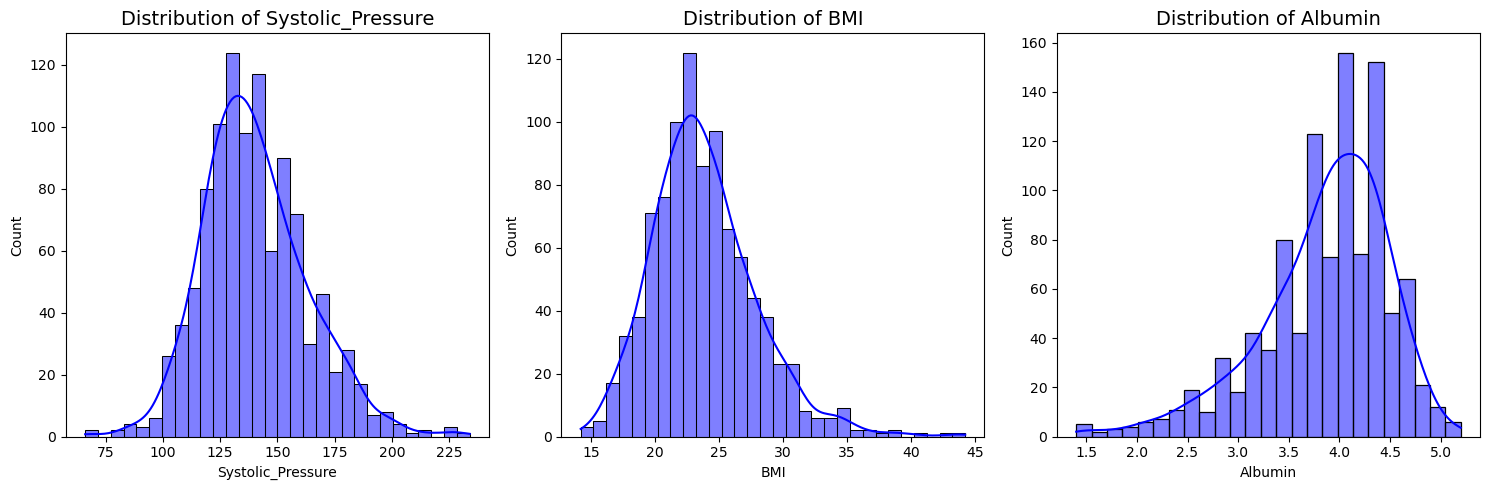

In [13]:
missing_numeric_cols = ['Systolic_Pressure','BMI', 'Albumin']

plt.figure(figsize=(15, 5))
### view the skew value and the distribution of the missing numeric columns
for i, col in enumerate(missing_numeric_cols, 1):
    plt.subplot(1, 3, i)
    
    print(f'Skew value of {col} is {skew(data[col].dropna())}\n')
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.show()

In the visualization, it is observed that:
- the skewness value of the attributes are above 0.5.
- BMI attribute is highly postively skewed.
- Albumin is highly skewed negatively.
- median will be used to impute the missing values because median is also less sensitive to outliers.
- skewness tells makes us make decision for imputation such as 
    - when the feature is symemetric (<0.5) we use the mean
    - or when it is skewed value is (>0.5) we use the median 

In [14]:
## fill continous values with median

for col in missing_numeric_cols:
    data[col] = data[col].fillna(data[col].median())

In [15]:
data.isnull().sum().sort_values(ascending=False)

Dipstick_Proteinuria        2
Proteinuria                 2
Occult_Blood_in_Urine       2
Diuretics                   0
Calcium_Channel_Blocker     0
RAAS_Inhibitor              0
Diabetes                    0
Previous_CVD                0
Hypertension                0
UPCR_Severity               0
Protein_Creatinine_Ratio    0
Sex                         0
Age                         0
CKD_Risk                    0
CKD_Stage                   0
eGFR                        0
Creatinine                  0
Albumin                     0
Hemoglobin                  0
CKD_Cause                   0
BMI                         0
Systolic_Pressure           0
CKD_Progression             0
dtype: int64

### Filling Categorical Columns

- There are just two missing rows in the dataset, we fill the categorical columns with mode of each attributes.
- This won't make the dataset bias.

Will fill the missing values of each 

In [16]:
# Print the count of each category in the categorical columns
print(data['Dipstick_Proteinuria'].value_counts().sort_values(ascending=False))
print(data['Proteinuria'].value_counts().sort_values(ascending=False))
print(data['Occult_Blood_in_Urine'].value_counts().sort_values(ascending=False))

Dipstick_Proteinuria
 3.0    261
-1.0    238
 2.0    226
 1.0    146
 0.0    144
 4.0     33
Name: count, dtype: int64
Proteinuria
1.0    666
0.0    382
Name: count, dtype: int64
Occult_Blood_in_Urine
0.0    691
1.0    357
Name: count, dtype: int64


- Fill missing rows with the mode of each CKD_Stage class. I chose this because it has more distinct class compared to CKD_Progression
- Fill each missing categorical column with the mode of the CKD_Class they fall under. 
- That is category imputation not global imputation
- Example: the first row of the missing dataset has a CKD_Stage of 4, the value of the other categories like Dipstick_Proteinuria, Proteinuia, Occult_Blood_in_Urine can have different value compared to a patient in Stage 3. 
- This reduces the general noise in the dataset.

In [17]:
# The count of each  targetclass 
print(data['CKD_Stage'].value_counts())
print(data['CKD_Progression'].value_counts())

# print the missing row 
data[data.isnull().any(axis=1)]

CKD_Stage
3    433
4    336
5    191
2     90
Name: count, dtype: int64
CKD_Progression
0    790
1    260
Name: count, dtype: int64


,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,CKD_Risk,Dipstick_Proteinuria,Proteinuria,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
571,1,64,134.0,24.5,3,12.4,4.0,3.03,17.49,4,9.0,NaN,NaN,NaN,1.09,3.0,1,0,0,1,1,0,0
572,1,74,150.0,23.4,2,11.5,3.7,1.26,43.81,3,6.0,NaN,NaN,NaN,1.37,3.0,1,0,0,1,1,0,0


- Both missing features are of the same CKD_Progression.

In [18]:
missing_cols = ['Dipstick_Proteinuria', 'Proteinuria', 'Occult_Blood_in_Urine']

for col in missing_cols:
        data[col] = data.groupby('CKD_Risk')[col].transform(
        lambda x: x.fillna(x.mode()[0]))

In [19]:
# data['Dipstick_Proteinuria'] = data.groupby('CKD_Risk')['Dipstick_Proteinuria'].transform(
#         lambda x: x.fillna(x.mode()[0]))

In [20]:
# view the filled data
data.iloc[571:573]

,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,CKD_Risk,Dipstick_Proteinuria,Proteinuria,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
571,1,64,134.0,24.5,3,12.4,4.0,3.03,17.49,4,9.0,3.0,1.0,0.0,1.09,3.0,1,0,0,1,1,0,0
572,1,74,150.0,23.4,2,11.5,3.7,1.26,43.81,3,6.0,2.0,1.0,1.0,1.37,3.0,1,0,0,1,1,0,0


- Each missing row in a categorical column is replaced with the most frequent value (mode) of its corresponding CKD_Stage group.
- This reduced bias compare to using a global mode.

In [21]:
## Understand the correlation of the attributes to the target class CKD_Stage
data.corr()['CKD_Stage'].sort_values(ascending=False).drop('CKD_Stage')

CKD_Risk                    0.965663
Creatinine                  0.772368
CKD_Progression             0.467245
UPCR_Severity               0.389203
Dipstick_Proteinuria        0.356449
Proteinuria                 0.342727
Protein_Creatinine_Ratio    0.321445
Diuretics                   0.316309
Calcium_Channel_Blocker     0.244104
Hypertension                0.232554
Diabetes                    0.207847
Age                         0.196187
RAAS_Inhibitor              0.181891
Previous_CVD                0.147216
Systolic_Pressure           0.107954
Sex                         0.091089
BMI                         0.044416
Occult_Blood_in_Urine       0.029387
CKD_Cause                  -0.234481
Albumin                    -0.235793
Hemoglobin                 -0.569543
eGFR                       -0.919932
Name: CKD_Stage, dtype: float64

Correlation to multiclass CKD_Stage
- It is observed that CKD_Risk has a high positive correlation value of 97% to the CKD_Stage.
- Creatinine has a high postive correlation of 77%
- eGFR has a strong negative correlation with 92%
- Occult_Blood_in_Urine the least correlation to CKD_stage of 0.02

In [22]:
## Data correlation with binary class label
data.corr()['CKD_Progression'].sort_values(ascending=False).drop('CKD_Progression')

CKD_Risk                    0.519427
Creatinine                  0.518602
Protein_Creatinine_Ratio    0.496221
Dipstick_Proteinuria        0.482192
CKD_Stage                   0.467245
UPCR_Severity               0.424114
Proteinuria                 0.397136
Diabetes                    0.250129
Systolic_Pressure           0.209266
Diuretics                   0.192967
Calcium_Channel_Blocker     0.170925
Hypertension                0.149738
Occult_Blood_in_Urine       0.136627
RAAS_Inhibitor              0.125475
BMI                         0.070465
Previous_CVD                0.020767
Sex                         0.014445
Age                        -0.084086
CKD_Cause                  -0.276506
Hemoglobin                 -0.335403
Albumin                    -0.344357
eGFR                       -0.440546
Name: CKD_Progression, dtype: float64

- There are no strong correlations to the binary class label

- The attributes have moderate weak correlation to the binary class 

In [23]:
data['CKD_Stage'].unique()

array([3, 5, 2, 4])

In [24]:
# Understand the statistical summary of the dataset
data.describe()

,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,CKD_Risk,Dipstick_Proteinuria,Proteinuria,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,1.300000,67.315238,140.239048,23.758095,2.248571,11.962476,3.854000,2.260276,32.913067,3.598095,7.084762,1.219048,0.636190,0.340952,2.160962,2.289524,0.903810,0.268571,0.377143,0.637143,0.478095,0.337143,0.247619
std,0.458476,13.571920,22.678568,3.834425,1.010961,2.281517,0.632341,1.712716,18.795473,0.881110,3.085292,1.579667,0.481324,0.474255,3.231214,0.867804,0.294993,0.443428,0.484902,0.481053,0.499758,0.472959,0.431835
min,1.000000,22.000000,66.000000,14.200000,1.000000,5.900000,1.400000,0.510000,2.470000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,61.000000,125.000000,21.400000,1.000000,10.200000,3.500000,1.200000,17.570000,3.000000,4.000000,0.000000,0.000000,0.000000,0.130000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,138.000000,23.300000,2.000000,12.000000,4.000000,1.740000,29.885000,4.000000,7.000000,1.000000,1.000000,0.000000,0.740000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,77.000000,153.000000,25.600000,3.000000,13.600000,4.300000,2.680000,45.867500,4.000000,9.000000,3.000000,1.000000,1.000000,2.847500,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,94.000000,234.000000,44.200000,4.000000,18.500000,5.200000,13.320000,89.980000,5.000000,12.000000,4.000000,1.000000,1.000000,20.180000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In the statistics summary above, it can be observed that there are outliers in Creatinine attribute because the gap between the 75% and the max value is so high. 
- Visualize the attribute on a box plot and a scatter plot to understand and remove the outliers

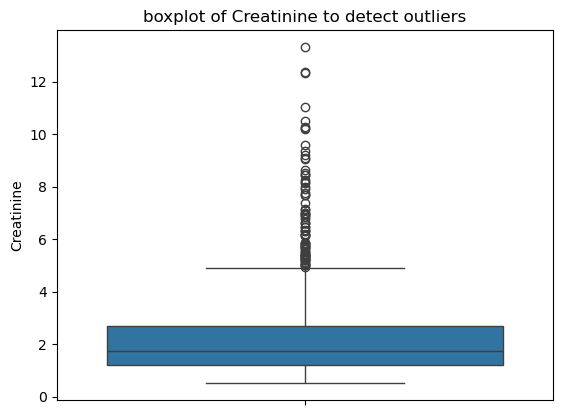

In [25]:
## There is an outlier at Creatinine, view the boxplot to understand
sns.boxplot(data['Creatinine'])
plt.title('boxplot of Creatinine to detect outliers')
plt.show()

In [26]:
# view the scatter plot to understand
fig_cr = go.Figure()
fig_cr.add_trace(go.Scatter(x=data.index, y=data['Creatinine'], mode='markers', marker=dict(color='blue')))
fig_cr.update_layout(title='Scatter plot of Creatinine', xaxis_title='Index', yaxis_title='Creatinine')
fig_cr.show()

In [27]:
## remove the outlier
Q3 = data['Creatinine'].quantile(0.75)
Q1 = data['Creatinine'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_mask = (data['Creatinine'] < lower_bound) | (data['Creatinine'] > upper_bound)
data = data[~new_mask].reset_index(drop=True)   

In [28]:
## view the new statistical summary of the dataset
data.describe()

,Sex,Age,Systolic_Pressure,BMI,CKD_Cause,Hemoglobin,Albumin,Creatinine,eGFR,CKD_Stage,CKD_Risk,Dipstick_Proteinuria,Proteinuria,Occult_Blood_in_Urine,Protein_Creatinine_Ratio,UPCR_Severity,Hypertension,Previous_CVD,Diabetes,RAAS_Inhibitor,Calcium_Channel_Blocker,Diuretics,CKD_Progression
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,1.304438,67.683179,139.608875,23.717957,2.274510,12.150774,3.875129,1.866863,35.064943,3.480908,6.679051,1.113519,0.606811,0.324045,1.962384,2.235294,0.897833,0.270382,0.363261,0.632611,0.464396,0.317853,0.197110
std,0.460406,13.470190,22.646237,3.802004,1.005656,2.231296,0.630550,0.930970,17.955386,0.814320,2.858795,1.581633,0.488710,0.468259,3.128799,0.878081,0.303024,0.444386,0.481188,0.482343,0.498988,0.465883,0.398022
min,1.000000,22.000000,69.000000,14.200000,1.000000,5.900000,1.400000,0.510000,7.860000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,61.000000,125.000000,21.400000,2.000000,10.500000,3.600000,1.170000,20.010000,3.000000,4.000000,0.000000,0.000000,0.000000,0.110000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,137.000000,23.300000,2.000000,12.200000,4.000000,1.620000,31.880000,3.000000,6.000000,1.000000,1.000000,0.000000,0.580000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,77.000000,152.000000,25.600000,3.000000,13.700000,4.300000,2.400000,47.170000,4.000000,9.000000,3.000000,1.000000,1.000000,2.480000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,94.000000,234.000000,43.100000,4.000000,18.500000,5.200000,4.900000,89.980000,5.000000,12.000000,4.000000,1.000000,1.000000,20.180000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
## plot the new scatter plot of Creatinine to confirm the outlier has been removed
fig_cr = go.Figure()
fig_cr.add_trace(go.Scatter(x=data.index, y=data['Creatinine'], mode='markers', marker=dict(color='blue')))
fig_cr.update_layout(title='Scatter plot of Creatinine', xaxis_title='Index', yaxis_title='Creatinine')
fig_cr.show()

## Visualizations to understand the Data

In [30]:
## plot a pie chart of the binary class
binary_class = data['CKD_Progression'].value_counts(ascending=False).reset_index()
print(binary_class)

# visualize the rows
fig = px.pie(binary_class, values='count', names='CKD_Progression', title='Binary count of Chronic Kidney Disease Progression')
fig.show()

   CKD_Progression  count
0                0    778
1                1    191


The pie chart above shows that the dataset has 80.3% of chronic kidney disease not progressing. 

In [31]:
## plot a pie chart of the Multiclass label
multi_class = data['CKD_Stage'].value_counts(ascending=False).reset_index()
print(multi_class)

# visualize the rows
fig = px.pie(multi_class, values='count', names='CKD_Stage', title='Multiclass count of Chronic Kidney Disease Stage')
fig.show()

   CKD_Stage  count
0          3    433
1          4    336
2          5    110
3          2     90


- **Stage 3** has the highest stage of Chronic Kidney Disease, cases which is **44..7% (433)** of the dataset
- **34.7% (336)** of the dataset has **Stage 4** Chronic Kidney Disease.
- **11.4% (110)** of the data dataset has **Stage 5**
- **9.29% (90)** of the dataset has **stage 2** Chronic Kidney Disease. 

    - A large proportion of patients in the dataset are diagnosed with Stage 3 Chronic Kidney Disease. 
    - This may indicate that many patients seek medical care only after the diseas has progressed rather than at earlier stages. 

In [32]:
## Plotting the top 3 correlated attributes with the CKD_Stage multiclass stage
stage_bar_risk = data['CKD_Risk'].value_counts(ascending=False).reset_index()
stage_bar_risk

,CKD_Risk,count
0,9.0,224
1,4.0,180
2,6.0,159
3,5.0,95
4,12.0,95
5,7.0,64
6,8.0,48
7,1.0,38
8,3.0,35
9,2.0,16


In [33]:
fig_bar_c = px.bar(stage_bar_risk, x='CKD_Risk', y='count', title='Count of CKD Risk Categories')
fig_bar_c.show()

- It is observed that **CKD_Risk category 9** has the highest count of 224, followed by **Category 4** (180), and **category 6** (159).

- while category 10 has the lowest value of 5.  

In [34]:
## Plotting the scatterplot of Creatinine 
print(data['Creatinine'].nunique())
print(data['eGFR'].nunique())

315
875


In [35]:
# plot the scatterplot of Creatinine & EFGR
## Plot the scatterplot of efgr & ckd_risk
print(data['Creatinine'].corr(data['eGFR']))

fig_s =go.Figure()

fig_s.add_trace(go.Scatter(x=data['eGFR'], y=data['Creatinine'], mode='markers', marker=dict(color='red')))
fig_s.update_layout(title='eGFR vs Creatinine', xaxis_title='eGFR', yaxis_title='Creatinine')
#Display
fig_s.show()

-0.8457159729084792


- There is a strong negative correlation between creatinine and eGFR
- As the value of eGFR increases, Creatinine decreases 

In [36]:
# print(data['BMI'].corr(data['Age']))

# fig_c = go.Figure()

# fig_c.add_trace(go.line(x=data['Age'], y = data['BMI'], mode='markers', marker=dict(color='green')))
# fig_c.update_layout(title='Diabetes vs CKD_Cause', xaxis_title='Diabetes', yaxis_title='CKD_Cause')

# fig_c.show()

In [37]:
# line_data = data.groupby('Age')['CKD_Stage'].mean().reset_index()

# fig_l = go.Figure()
# fig_l.add_trace(go.Scatter(x=line_data['Age'], y=line_data['CKD_Progression'], mode='lines', marker=dict(color='green')))
# #Create line plot
# fig_l.update_layout(title='Age vs CKD_Progression', xaxis_title='Age', yaxis_title='CKD_Progression')
# fig_l.show()

In [38]:
import plotly.express as px

line_data = data.groupby(['Age', 'CKD_Stage']).size().reset_index(name='Count')

fig_p = px.bar(
    line_data,
    x='Age',
    y='Count',
    color='CKD_Stage',
    title='Number of CKD Cases by Age and Stage',
    barmode='stack'  # or 'group' if you prefer side-by-side
)
# fig_p.update_layout(width=1000, height=600)
fig_p.show()


- The interactive bar chart allows us to analyze the distribution of CKD stages across different age groups.
- For example, at age 77, there are 6 individuals in stage 5, 19 in stage 4, 16 in stage 3, and 2 in stage 2.

## Create Binary Dataset

In [49]:
### Check correlation of features with the target CKD_Progression
data.corr()['CKD_Progression'].drop('CKD_Progression').sort_values(ascending=True)

Albumin                    -0.353787
eGFR                       -0.344380
CKD_Cause                  -0.266944
Hemoglobin                 -0.266839
Age                        -0.045182
Sex                         0.027355
Previous_CVD                0.037129
BMI                         0.046264
Occult_Blood_in_Urine       0.105909
RAAS_Inhibitor              0.130066
Hypertension                0.141446
Calcium_Channel_Blocker     0.157607
Diuretics                   0.168749
Systolic_Pressure           0.184603
Diabetes                    0.240661
Proteinuria                 0.356355
CKD_Stage                   0.357445
UPCR_Severity               0.384435
CKD_Risk                    0.423352
Creatinine                  0.426941
Dipstick_Proteinuria        0.445236
Protein_Creatinine_Ratio    0.480062
Name: CKD_Progression, dtype: float64

In [50]:
binary_data = data.copy()
binary_data.to_csv('Binary_data.csv', index=False)

In [44]:
## Multiclass dataset for modelling "CKD_Stage"
data.corr()['CKD_Stage'].drop('CKD_Stage').sort_values(ascending=False)

CKD_Risk                    0.956993
Creatinine                  0.876996
CKD_Progression             0.357445
UPCR_Severity               0.335694
Diuretics                   0.299208
Dipstick_Proteinuria        0.292844
Proteinuria                 0.283533
Age                         0.282787
Protein_Creatinine_Ratio    0.270732
Calcium_Channel_Blocker     0.235402
Hypertension                0.228625
RAAS_Inhibitor              0.195163
Diabetes                    0.191722
Previous_CVD                0.179855
Sex                         0.124358
Systolic_Pressure           0.074800
BMI                         0.032811
Occult_Blood_in_Urine      -0.032525
Albumin                    -0.214692
CKD_Cause                  -0.228229
Hemoglobin                 -0.525266
eGFR                       -0.905344
Name: CKD_Stage, dtype: float64

- Drop attribute in the multiclass that has correlation greater than 90%
- CKD_Risk and eGFR has correlation greater than 90%

In [51]:
## Create Multiclass dataset and remove features that has over 90% correlation
multi_data = data.copy()
multi_data = multi_data.drop(['CKD_Risk', 'eGFR'], axis = 1)
multi_data.to_csv('Multi_data.csv', index=False)